<a href="https://colab.research.google.com/github/huseyiinozel/CPE312-Machine-Learning-Class/blob/main/WEEK12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 22s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
classes  = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:',nClasses)
print('output classes:',classes)

Total number of outputs: 10
output classes: [0 1 2 3 4 5 6 7 8 9]


In [6]:
label_dict={
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

Text(0.5, 1.0, 'Label:frog)')
Text(0.5, 1.0, '(Label:cat)')


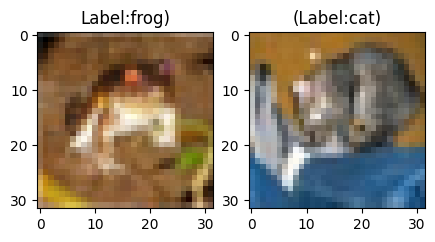

In [7]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img = np.reshape(x_train[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("Label:"+str(label_dict[y_train[0][0]]) + ")"))

plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label:"+str(label_dict[y_test[0][0]]) + ")"))

In [8]:
np.min(x_train),np.max(x_train)

(0, 255)

In [9]:
x_train=x_train/255.0

In [10]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
x_train_flat=x_train.reshape(-1,3072)
feat_cols=['pixel'+str(i)for i in range(x_train_flat.shape[1])]
df_cifar=pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label']=y_train

In [13]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [14]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components=2)
principalcomponent_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [15]:
principal_cifar_Df=pd.DataFrame(data=principalcomponent_cifar,columns=['principal component 1','principal component 2'])
principal_cifar_Df['y']=y_train

In [16]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [17]:
pca_cifar.explained_variance_ratio_

array([0.2907663 , 0.11253144])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

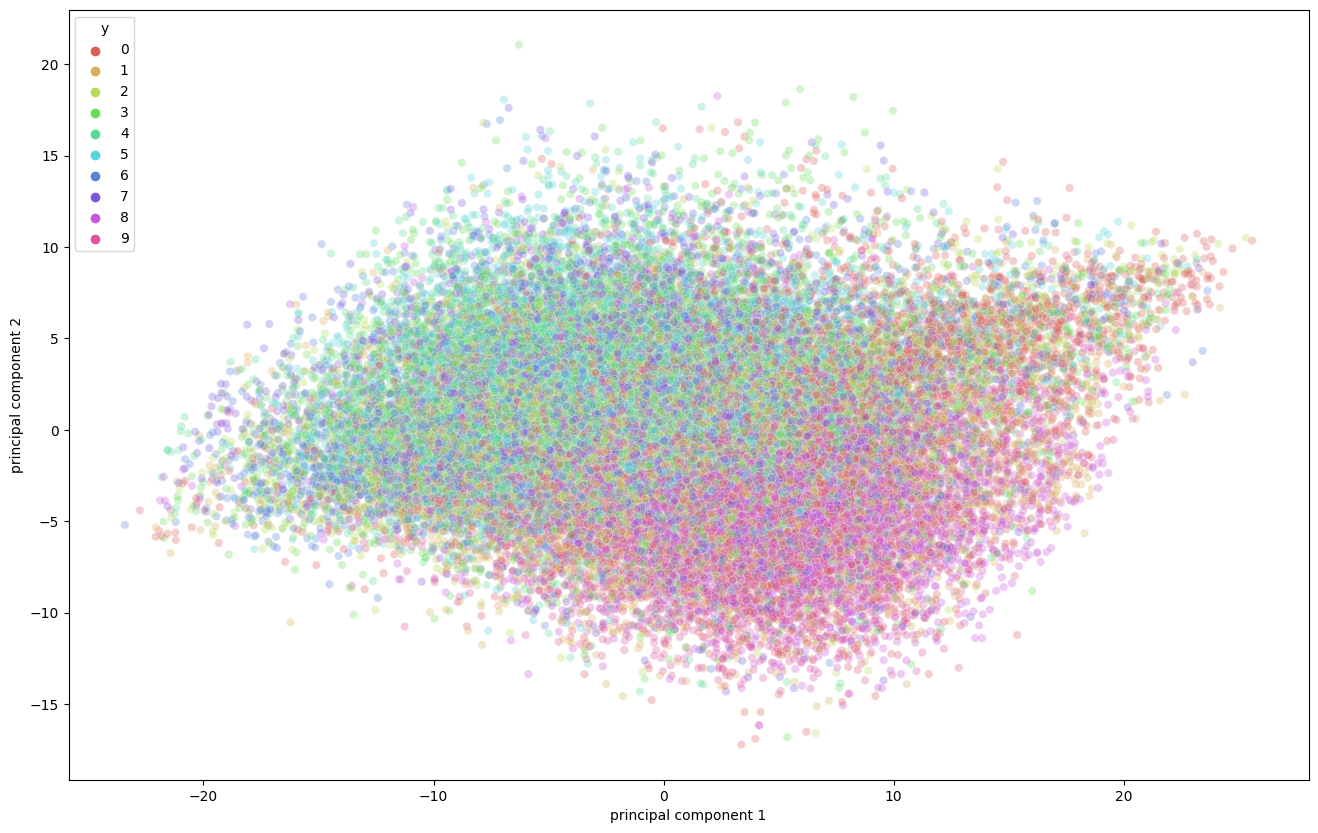

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1",y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls",10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [20]:
iris=load_iris()
data=iris.data
feature_names = iris.feature_names
y=iris.target
df=pd.DataFrame(data,columns=feature_names)
df["sinif"]=y
x=data
from sklearn.decomposition import PCA
pca=PCA(n_components = 2 , whiten = True)
pca.fit(x)
x_pca=pca.transform(x)
print("variance ratio",pca.explained_variance_ratio_)
print("sum",sum(pca.explained_variance_ratio_))

variance ratio [0.92461872 0.05306648]
sum 0.977685206318795


In [21]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     sinif  
0        0  
1

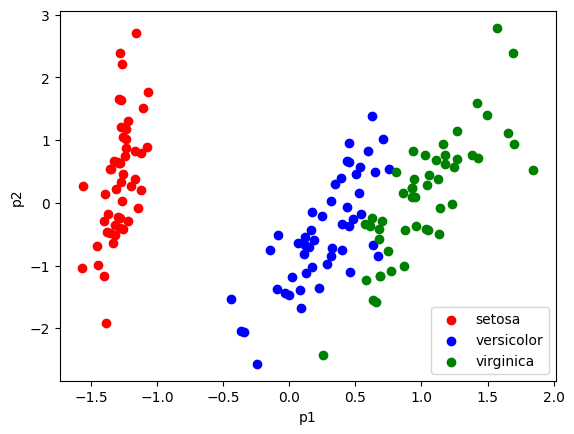

In [22]:
df["p1"] = x_pca[:,0]
df["p2"]=x_pca[:,1]
color=["red","blue","green"]
import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif==each],df.p2[df.sinif==each],color=color[each],label=iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()